# Data in More Complex Formats #
Resources about XML:
+ [W3Schools](https://www.w3schools.com/js/js_json_intro.asp)
+ [tizag.com](http://www.tizag.com/xmlTutorial/index.php)


## Parsing XML ##
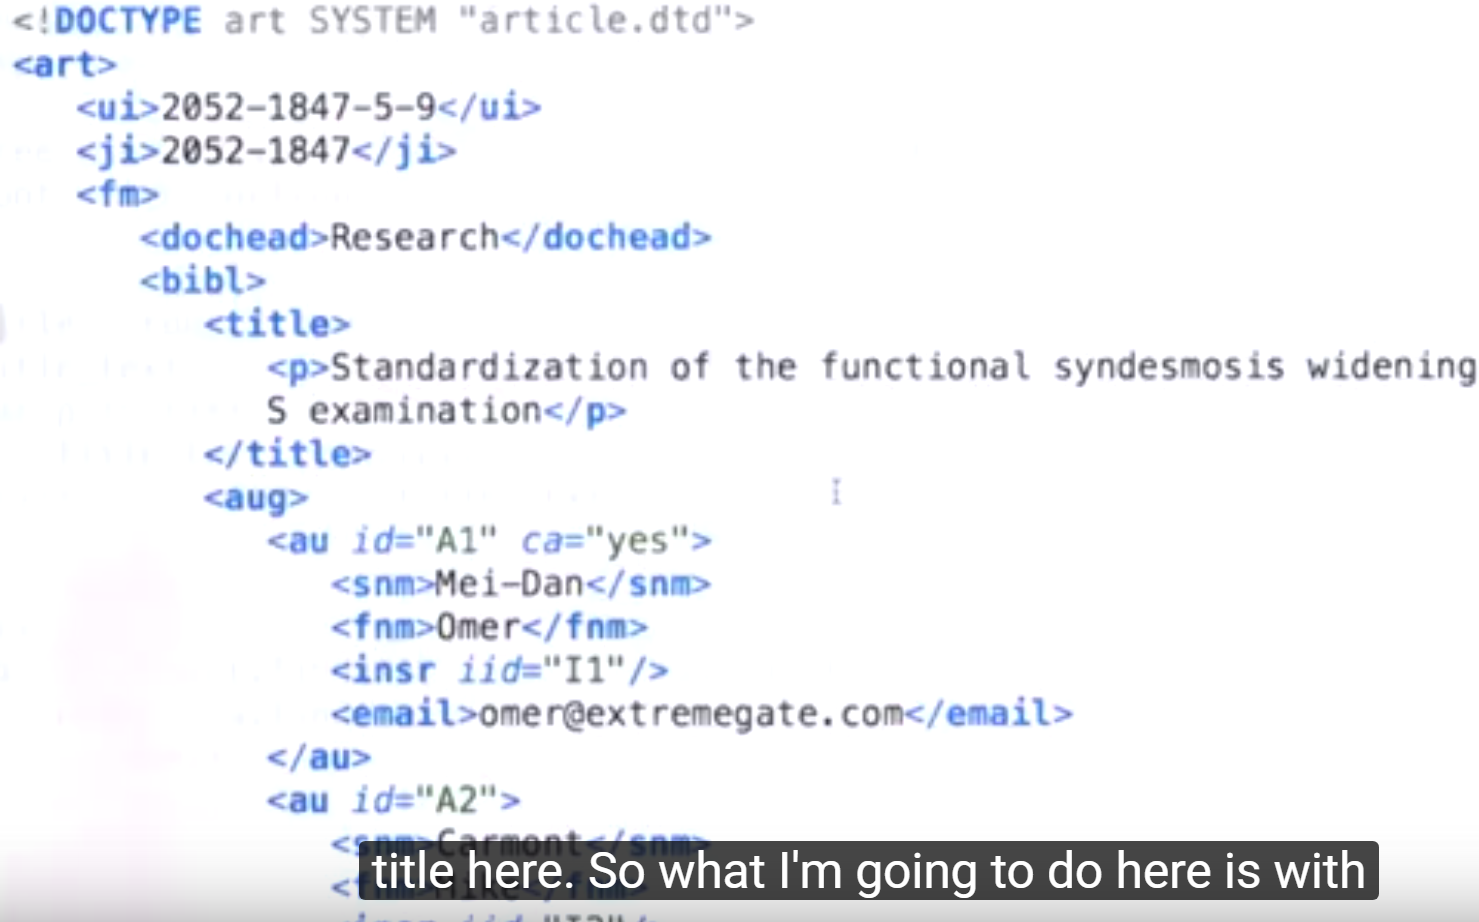

In [ ]:
import xml.etree.ElementTree as ET
import pprint

tree = ET.parse('xxx.xml')
root = tree.getroot()

print "\nChildren of root:"
for child in root:
    print child.tag
    
title = root.find('./fm/bibl/title')
title_text = ""
for p in title:
    title_text += p.text
print "\nTitle:\n", title_text

print "\nAuthor email addresses:"
for a in root.findall("./fm/bibl/aug/au"):
    email = a.find('email')
    if email is not None:
        print email.text

### Quiz: Extracting Data & Handling Attributes###

In [ ]:
#!/usr/bin/env python
# Your task here is to extract data from xml on authors of an article
# and add it to a list, one item for an author.
# See the provided data structure for the expected format.
# The tags for first name, surname and email should map directly
# to the dictionary keys
import xml.etree.ElementTree as ET

article_file = "exampleResearchArticle.xml"


def get_root(fname):
    tree = ET.parse(fname)
    return tree.getroot()


def get_authors(root):
    authors = []
    for author in root.findall('./fm/bibl/aug/au'):
        data = {
                "fnm": None,
                "snm": None,
                "email": None,
                "insr": []
        }

        # YOUR CODE HERE
        data["fnm"] = author.find('./fnm').text
        data["snm"] = author.find('./snm').text
        data["email"] = author.find('./email').text
        
        insr = author.findall('./insr')
        for i in insr:
            data["insr"].append(i.attrib["iid"])
        
        authors.append(data)

    return authors


def test():
    solution = [{'fnm': 'Omer', 'snm': 'Mei-Dan', 'email': 'omer@extremegate.com'}, {'fnm': 'Mike', 'snm': 'Carmont', 'email': 'mcarmont@hotmail.com'}, {'fnm': 'Lior', 'snm': 'Laver', 'email': 'laver17@gmail.com'}, {'fnm': 'Meir', 'snm': 'Nyska', 'email': 'nyska@internet-zahav.net'}, {'fnm': 'Hagay', 'snm': 'Kammar', 'email': 'kammarh@gmail.com'}, {'fnm': 'Gideon', 'snm': 'Mann', 'email': 'gideon.mann.md@gmail.com'}, {'fnm': 'Barnaby', 'snm': 'Clarck', 'email': 'barns.nz@gmail.com'}, {'fnm': 'Eugene', 'snm': 'Kots', 'email': 'eukots@gmail.com'}]
    
    root = get_root(article_file)
    data = get_authors(root)

    assert data[0] == solution[0]
    assert data[1]["fnm"] == solution[1]["fnm"]


test()

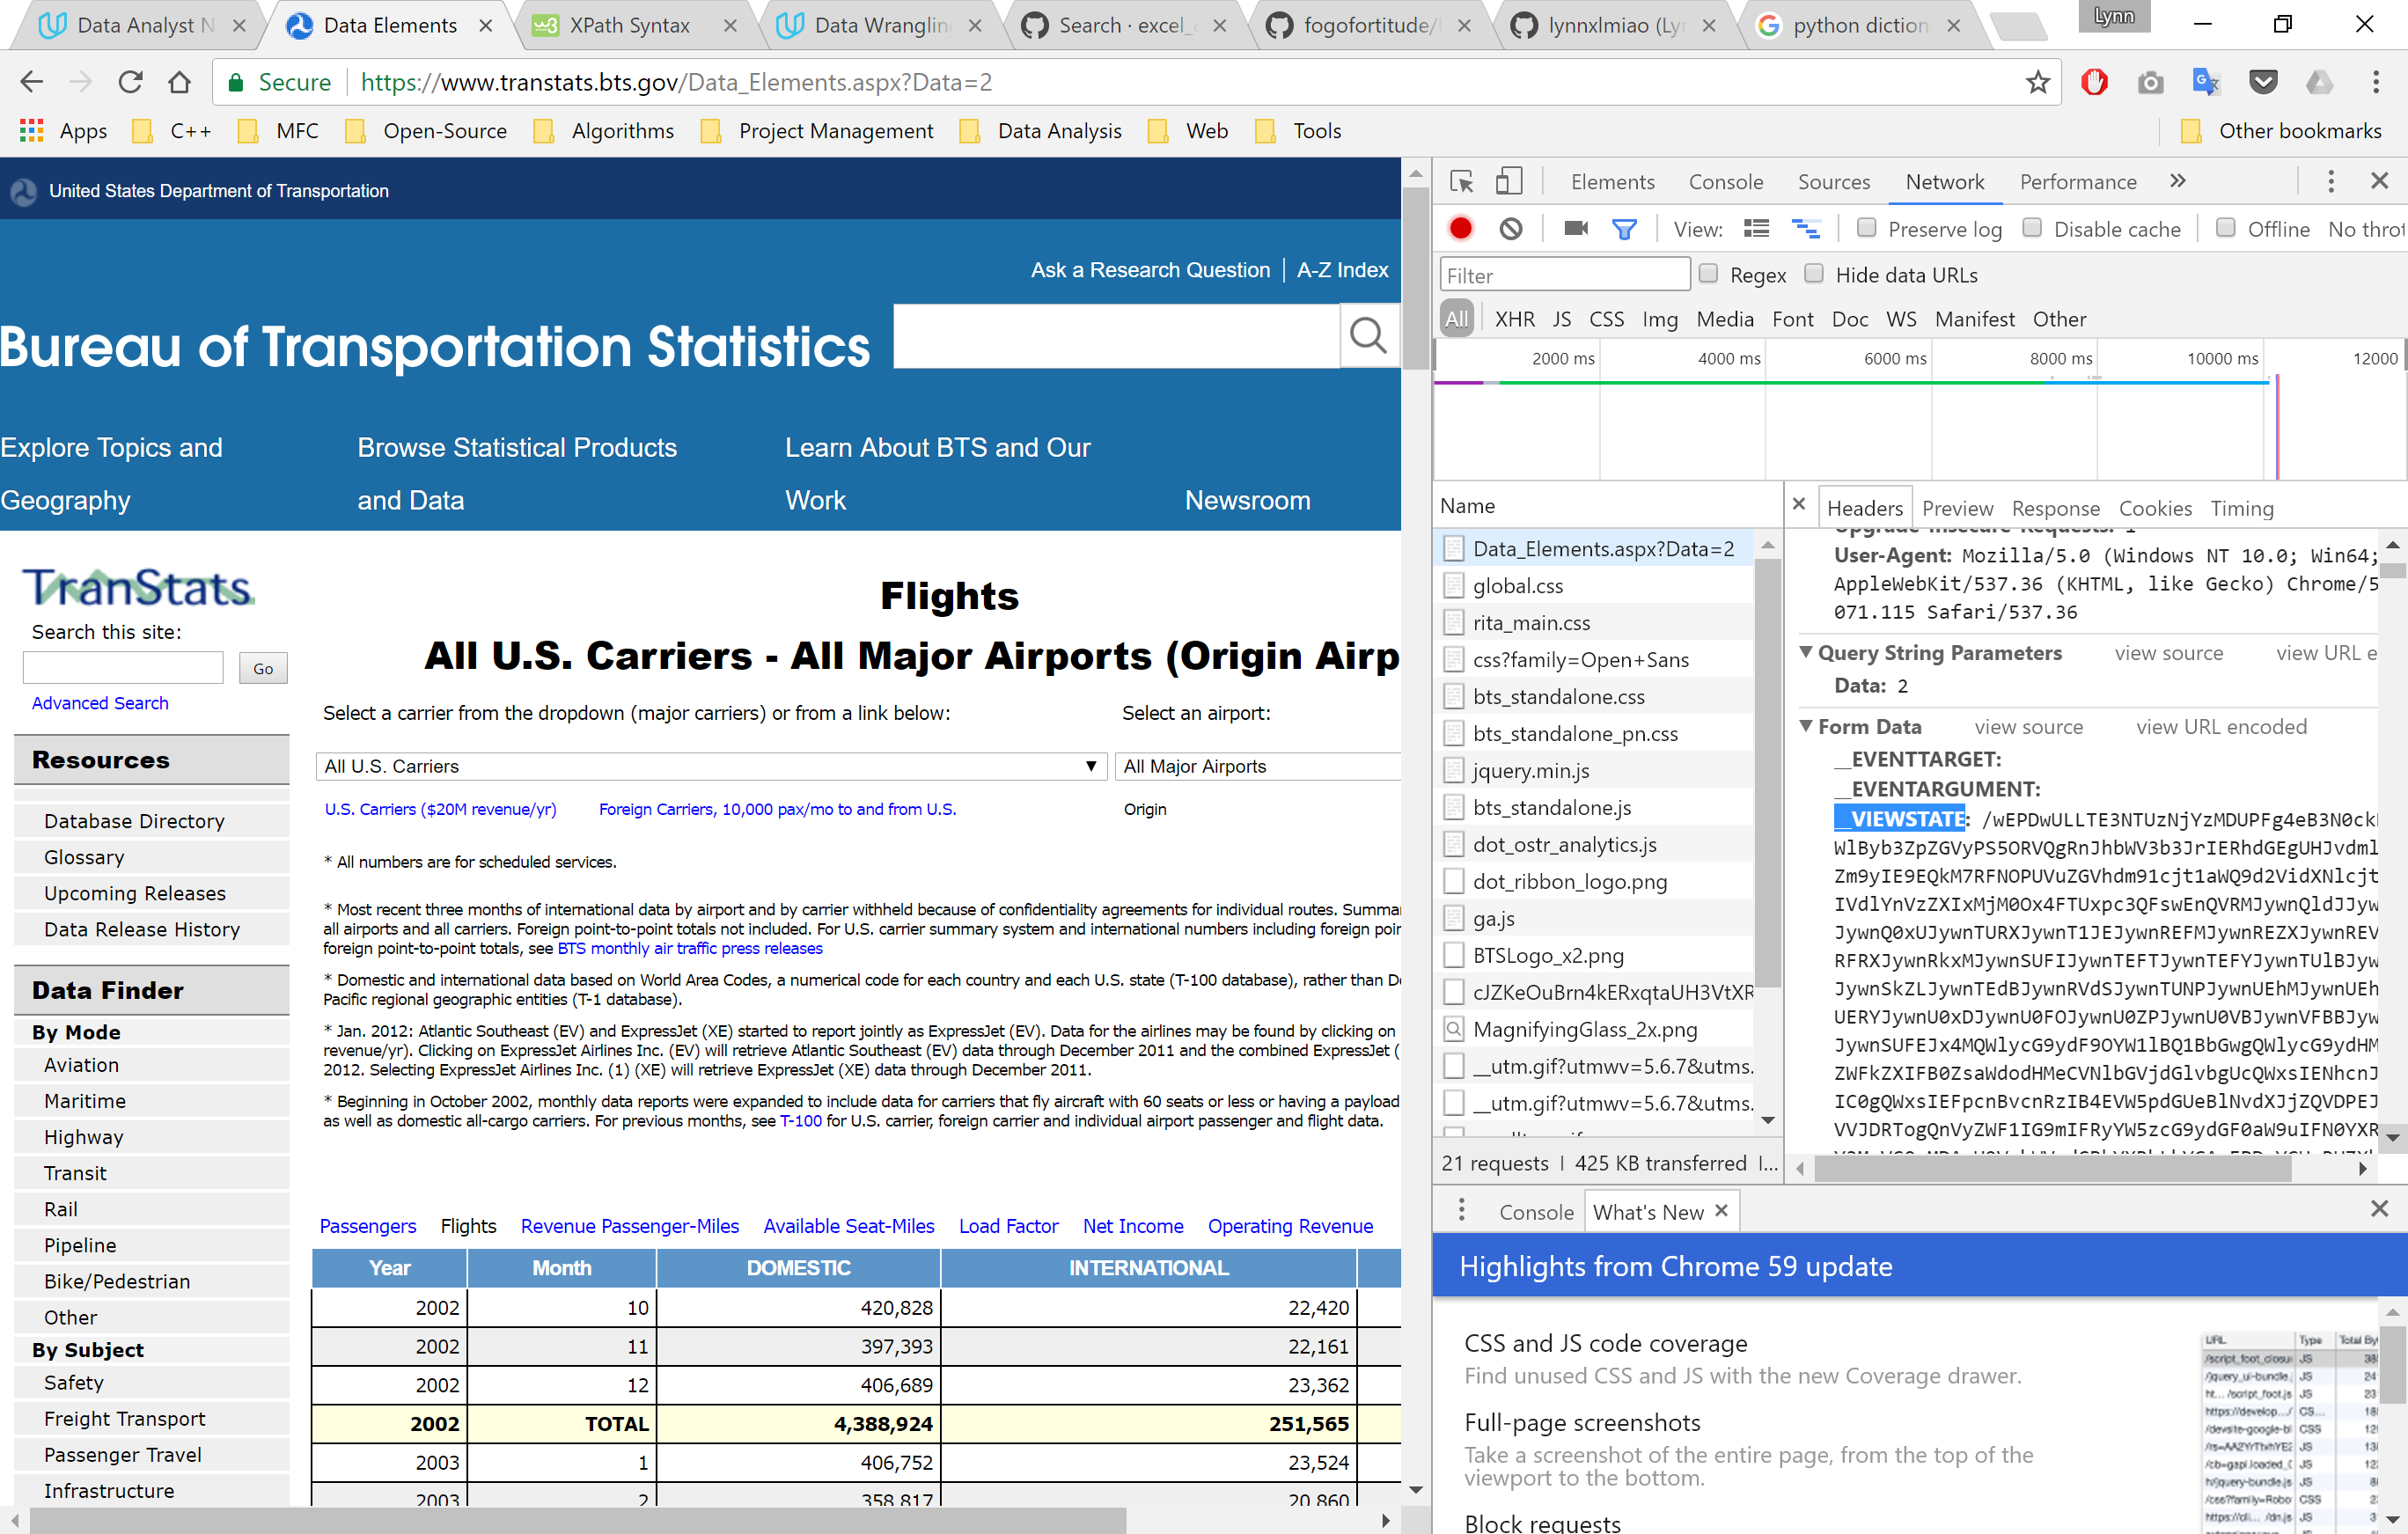

### Best Practice For Scraping ###
1. Look at how a browser makes requests
2. Emulate in code
3. If stuff blows up, look at your http traffic
4. return to 1 until it works

## Quize##
### Data in More Complex formats ###
#### Carrier List ####

In [ ]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
"""
Your task in this exercise is to modify 'extract_carrier()` to get a list of
all airlines. Exclude all of the combination values like "All U.S. Carriers"
from the data that you return. You should return a list of codes for the
carriers.

All your changes should be in the 'extract_carrier()' function. The
'options.html' file in the tab above is a stripped down version of what is
actually on the website, but should provide an example of what you should get
from the full file.

Please note that the function 'make_request()' is provided for your reference
only. You will not be able to to actually use it from within the Udacity web UI.
"""

from bs4 import BeautifulSoup
html_page = "options.html"


def extract_carriers(page):
    data = []

    with open(page, "r") as html:
        # do something here to find the necessary values
        soup = BeautifulSoup(html, "lxml")
        carriers_list = soup.find(id='CarrierList')
        for carrier in carriers_list.find_all('option'):
            data_exclude = ["All", "AllUS", "AllForeign"]
            if carrier['value'] not in data_exclude:
                data.append(carrier['value'])
            
    return data


def make_request(data):
    eventvalidation = data["eventvalidation"]
    viewstate = data["viewstate"]
    airport = data["airport"]
    carrier = data["carrier"]

    r = s.post("https://www.transtats.bts.gov/Data_Elements.aspx?Data=2",
               data = (("__EVENTTARGET", ""),
                       ("__EVENTARGUMENT", ""),
                       ("__VIEWSTATE", viewstate),
                       ("__VIEWSTATEGENERATOR",viewstategenerator),
                       ("__EVENTVALIDATION", eventvalidation),
                       ("CarrierList", carrier),
                       ("AirportList", airport),
                       ("Submit", "Submit")))

    return r.text


def test():
    data = extract_carriers(html_page)
    assert len(data) == 16
    assert "FL" in data
    assert "NK" in data

if __name__ == "__main__":
    test()

#### Airport List ####

In [ ]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
"""
Complete the 'extract_airports()' function so that it returns a list of airport
codes, excluding any combinations like "All".

Refer to the 'options.html' file in the tab above for a stripped down version
of what is actually on the website. The test() assertions are based on the
given file.
"""

from bs4 import BeautifulSoup
html_page = "options.html"


def extract_airports(page):
    data = []
    with open(page, "r") as html:
        # do something here to find the necessary values
        soup = BeautifulSoup(html, "lxml")
        airports_list = soup.find(id='AirportList')
        for airport in airports_list.find_all('option'):
            data_exclude = ["All", "AllMajors", "AllOthers"]
            if airport['value'] not in data_exclude:
                data.append(airport['value'])

    return data


def test():
    data = extract_airports(html_page)
    assert len(data) == 15
    assert "ATL" in data
    assert "ABR" in data

if __name__ == "__main__":
    test()

#### Processing All ####

In [ ]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
"""
Let's assume that you combined the code from the previous 2 exercises with code
from the lesson on how to build requests, and downloaded all the data locally.
The files are in a directory "data", named after the carrier and airport:
"{}-{}.html".format(carrier, airport), for example "FL-ATL.html".

The table with flight info has a table class="dataTDRight". Your task is to
use 'process_file()' to extract the flight data from that table as a list of
dictionaries, each dictionary containing relevant data from the file and table
row. This is an example of the data structure you should return:

data = [{"courier": "FL",
         "airport": "ATL",
         "year": 2012,
         "month": 12,
         "flights": {"domestic": 100,
                     "international": 100}
        },
         {"courier": "..."}
]

Note - year, month, and the flight data should be integers.
You should skip the rows that contain the TOTAL data for a year.

There are couple of helper functions to deal with the data files.
Please do not change them for grading purposes.
All your changes should be in the 'process_file()' function.

The 'data/FL-ATL.html' file in the tab above is only a part of the full data,
covering data through 2003. The test() code will be run on the full table, but
the given file should provide an example of what you will get.
"""
from bs4 import BeautifulSoup
from zipfile import ZipFile
import os

datadir = "data"


def open_zip(datadir):
    with ZipFile('{0}.zip'.format(datadir), 'r') as myzip:
        myzip.extractall()


def process_all(datadir):
    files = os.listdir(datadir)
    return files


def process_file(f):
    """
    This function extracts data from the file given as the function argument in
    a list of dictionaries. This is example of the data structure you should
    return:

    data = [{"courier": "FL",
             "airport": "ATL",
             "year": 2012,
             "month": 12,
             "flights": {"domestic": 100,
                         "international": 100}
            },
            {"courier": "..."}
    ]


    Note - year, month, and the flight data should be integers.
    You should skip the rows that contain the TOTAL data for a year.
    """
    data = []
    info = {}
    info["courier"], info["airport"] = f[:6].split("-")
    # Note: create a new dictionary for each entry in the output data list.
    # If you use the info dictionary defined here each element in the list 
    # will be a reference to the same info dictionary.
    with open("{}/{}".format(datadir, f), "r") as html:

        soup = BeautifulSoup(html,'lxml')
        data = []

        flight_table = soup.find(id="DataGrid1")
        numerical = flight_table.find_all('tr')[1:] #remove header
        
        for option in numerical:
            item = option.find_all('td')
            if item[1].text != "TOTAL":
                data.append({"courier": info["courier"],
                              "airport": info["airport"],
                              "year": int(item[0].text),
                              "month": int(item[1].text),
                              "flights": {"domestic": int(item[2].text.replace(',', '')),
                                          "international": int(item[3].text.replace(',', ''))}
                            })


    return data


def test():
    print "Running a simple test..."
    open_zip(datadir)
    files = process_all(datadir)
    data = []
    # Test will loop over three data files.
    for f in files:
        data += process_file(f)
        
    assert len(data) == 399  # Total number of rows
    for entry in data[:3]:
        assert type(entry["year"]) == int
        assert type(entry["month"]) == int
        assert type(entry["flights"]["domestic"]) == int
        assert len(entry["airport"]) == 3
        assert len(entry["courier"]) == 2
    assert data[0]["courier"] == 'FL'
    assert data[0]["month"] == 10
    assert data[-1]["airport"] == "ATL"
    assert data[-1]["flights"] == {'international': 108289, 'domestic': 701425}
    
    print "... success!"

if __name__ == "__main__":
    test()

#### Patent Database ####

In [ ]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
"""
This and the following exercise are using US Patent database. The patent.data
file is a small excerpt of much larger datafiles that are available for
download from US Patent website. These files are pretty large ( >100 MB each).
The original file is ~600MB large, you might not be able to open it in a text
editor.

The data itself is in XML, however there is a problem with how it's formatted.
Please run this script and observe the error. Then find the line that is
causing the error. You can do that by just looking at the datafile in the web
UI, or programmatically. For quiz purposes it does not matter, but as an
exercise we suggest that you try to do it programmatically.

NOTE: You do not need to correct the error - for now, just find where the error
is occurring.
"""

import xml.etree.ElementTree as ET

PATENTS = 'patent.data'

def get_root(fname):

    tree = ET.parse(fname)
    return tree.getroot()


get_root(PATENTS)

Processing Patents

In [ ]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
# So, the problem is that the gigantic file is actually not a valid XML, because
# it has several root elements, and XML declarations.
# It is, a matter of fact, a collection of a lot of concatenated XML documents.
# So, one solution would be to split the file into separate documents,
# so that you can process the resulting files as valid XML documents.

import xml.etree.ElementTree as ET
PATENTS = 'patent.data'

def get_root(fname):
    tree = ET.parse(fname)
    return tree.getroot()

def files(filename):
    # generator for output files
    n = -1
    while True:
        n += 1
        yield open('{}-{}'.format(filename, n),'w') # yield returns a generator
        

def split_file(filename):
    """
    Split the input file into separate files, each containing a single patent.
    As a hint - each patent declaration starts with the same line that was
    causing the error found in the previous exercises.
    
    The new files should be saved with filename in the following format:
    "{}-{}".format(filename, n) where n is a counter, starting from 0.
    """
    pat = '<?xml'  # pattern that splits files
    outfile_iter = files(filename)

    with open(filename,'r') as infile:
        for line in infile:
            if pat in line:
                outfile = next(outfile_iter) # new file   
            outfile.write(line) # write line


def test():
    split_file(PATENTS)
    for n in range(4):
        try:
            fname = "{}-{}".format(PATENTS, n)
            f = open(fname, "r")
            if not f.readline().startswith("<?xml"):
                print "You have not split the file {} in the correct boundary!".format(fname)
            f.close()
        except:
            print "Could not find file {}. Check if the filename is correct!".format(fname)


test()